In [1]:
import sys
sys.path.append('../')

from g_ml.utilidades.metricas import MSE
from g_ml.utilidades.metricas import MRE
from g_ml.algoritmos.regressao import OLS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Implementação na tora

In [2]:
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy()
y = df['y'].to_numpy()

In [3]:
y

array([-2.08201726, -1.32698023, -1.10559772, -0.87394576, -0.28502695,
       -0.43115252, -0.79475402, -0.88606806, -0.89989978, -0.86184365,
       -0.88805183, -1.23595129, -0.71956827, -0.45202286,  0.09889951,
        0.34896973,  0.09747797,  0.70019809,  1.31051213,  1.00177576,
        1.00318231,  1.14910129,  1.59220607,  0.60909009,  0.59441623,
        0.70300732,  0.82332241,  1.10646439,  1.42295695,  2.30983768])

In [4]:
X = np.c_[np.ones(X.shape[0]), X]

In [5]:
X

array([[ 1.        , -1.        ],
       [ 1.        , -0.93103448],
       [ 1.        , -0.86206897],
       [ 1.        , -0.79310345],
       [ 1.        , -0.72413793],
       [ 1.        , -0.65517241],
       [ 1.        , -0.5862069 ],
       [ 1.        , -0.51724138],
       [ 1.        , -0.44827586],
       [ 1.        , -0.37931034],
       [ 1.        , -0.31034483],
       [ 1.        , -0.24137931],
       [ 1.        , -0.17241379],
       [ 1.        , -0.10344828],
       [ 1.        , -0.03448276],
       [ 1.        ,  0.03448276],
       [ 1.        ,  0.10344828],
       [ 1.        ,  0.17241379],
       [ 1.        ,  0.24137931],
       [ 1.        ,  0.31034483],
       [ 1.        ,  0.37931034],
       [ 1.        ,  0.44827586],
       [ 1.        ,  0.51724138],
       [ 1.        ,  0.5862069 ],
       [ 1.        ,  0.65517241],
       [ 1.        ,  0.72413793],
       [ 1.        ,  0.79310345],
       [ 1.        ,  0.86206897],
       [ 1.        ,

In [6]:
w = np.linalg.inv(X.T @ X) @ X.T @ y

In [7]:
w

array([0.06761792, 1.57486517])

In [8]:
y_pred = X @ w

In [9]:
y_pred

array([-1.50724724, -1.39863585, -1.29002446, -1.18141307, -1.07280168,
       -0.96419029, -0.8555789 , -0.74696751, -0.63835612, -0.52974473,
       -0.42113333, -0.31252194, -0.20391055, -0.09529916,  0.01331223,
        0.12192362,  0.23053501,  0.3391464 ,  0.44775779,  0.55636918,
        0.66498057,  0.77359197,  0.88220336,  0.99081475,  1.09942614,
        1.20803753,  1.31664892,  1.42526031,  1.5338717 ,  1.64248309])

In [10]:
mse = MSE(y, y_pred)

In [11]:
mse

0.2134009013293699

In [12]:
mse = np.mean(np.power((y - y_pred), 2))

In [13]:
mse

0.2134009013293699

## Criando uma classe aqui mesmo

In [14]:
class OLSS():
    def __init__(self):
        
        self.w = None
    
    def fit(self, X, y):
        # criando o vetor bias
        X = np.c_[np.ones(X.shape[0]), X]
        # atualizando o vetor de parametros de modelo
        parametro = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = parametro
    
    def predict(self, X):
        
        # criando o vetor bias
        X = np.c_[np.ones(X.shape[0]), X]
        
        return X @ self.w
    

In [15]:
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy()
y = df['y'].to_numpy()

In [16]:
model = OLSS()

In [17]:
model.fit(X, y)

In [18]:
model.w

array([0.06761792, 1.57486517])

In [19]:
y_pred  = model.predict(X)

In [20]:
y_pred

array([-1.50724724, -1.39863585, -1.29002446, -1.18141307, -1.07280168,
       -0.96419029, -0.8555789 , -0.74696751, -0.63835612, -0.52974473,
       -0.42113333, -0.31252194, -0.20391055, -0.09529916,  0.01331223,
        0.12192362,  0.23053501,  0.3391464 ,  0.44775779,  0.55636918,
        0.66498057,  0.77359197,  0.88220336,  0.99081475,  1.09942614,
        1.20803753,  1.31664892,  1.42526031,  1.5338717 ,  1.64248309])

In [21]:
y

array([-2.08201726, -1.32698023, -1.10559772, -0.87394576, -0.28502695,
       -0.43115252, -0.79475402, -0.88606806, -0.89989978, -0.86184365,
       -0.88805183, -1.23595129, -0.71956827, -0.45202286,  0.09889951,
        0.34896973,  0.09747797,  0.70019809,  1.31051213,  1.00177576,
        1.00318231,  1.14910129,  1.59220607,  0.60909009,  0.59441623,
        0.70300732,  0.82332241,  1.10646439,  1.42295695,  2.30983768])

In [22]:
mse = MSE(y, y_pred)

In [23]:
mse

0.2134009013293699

In [24]:
mre = MRE(y, y_pred)

In [25]:
mre

0.5865122801771744

muito bom nota zero

## Modularizando tudo

In [27]:
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy()
y = df['y'].to_numpy()

In [28]:
modelo = OLS()

In [29]:
modelo.fit(X, y)

In [30]:
modelo.w

array([0.06761792, 1.57486517])

In [31]:
y_pred = modelo.predict(X)

In [32]:
mse = MSE(y, y_pred)
mre = MRE(y, y_pred)

print(mse)
print(mre)


0.2134009013293699
0.5865122801771744


In [34]:
X_plot = np.linspace(X.max(), X.min(), 1000)
y_plot = modelo.predict(X_plot)

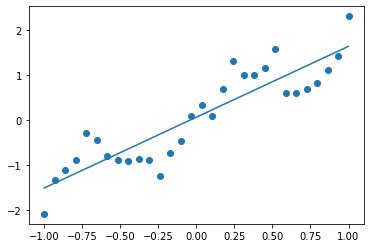

In [42]:
plt.scatter(X, y)
plt.plot(X_plot, y_plot)

In [ ]:
Claramente precisamos de um modelo não linear